# HLMA 408: Modèle linéaire

***
> __Auteur__: Joseph Salmon
> <joseph.salmon@umontpellier.fr>

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.animation as animation
from ipywidgets import interact, IntSlider, FloatLogSlider  # widget manipulation

%matplotlib inline
from IPython.display import HTML
from scipy.stats import t 

# Plot initialization


In [2]:
# saving tools for the course

params = {'axes.labelsize': 12,
          'font.size': 12,
          'legend.fontsize': 12,
          'xtick.labelsize': 10,
          'ytick.labelsize': 10,
          'text.usetex': True, # possibly set False if no Latex install on your machine
          'figure.figsize': (10, 7),
          'font.family' : 'sans-serif'}
plt.rcParams.update(params)

sns.set_context("poster")
sns.set_palette("colorblind")
sns.axes_style()
sns.set_style({'legend.frameon': True})
color_blind_list = sns.color_palette("colorblind", 8)
my_orange = color_blind_list[2]
my_green = color_blind_list[1]
my_blue = color_blind_list[0]

dirname = "../prebuiltimages/"
imageformat = ".pdf"

In [3]:
from download import download  # si download n'est pas installé décommenter + exécuter la ligne du dessus
saving = True
path_target = "./utils.py"
url_shared_files = "http://josephsalmon.eu/enseignement/Montpellier/HLMA408/sharedcode/utils.py"
download(url_shared_files, path_target, replace=False)
from utils import my_saving_display

Replace is False and data exists, so doing nothing. Use replace=True to re-download the data.


# Load data

In [4]:
# Original url:
url = 'https://forge.scilab.org/index.php/p/rdataset/source/file/master/csv/datasets/cars.csv'
# Alternative url:
# url = 'http://josephsalmon.eu/enseignement/TELECOM/MDI720/datasets/cars.csv'
df_cars = pd.read_csv(url, dtype=np.float64)
df_cars = df_cars.drop(columns='Unnamed: 0')

n_sample = df_cars.size

df_cars.columns = ['Vitesse', 'Distance']
df_cars.columns


Index(['Vitesse', 'Distance'], dtype='object')

# Plot data only

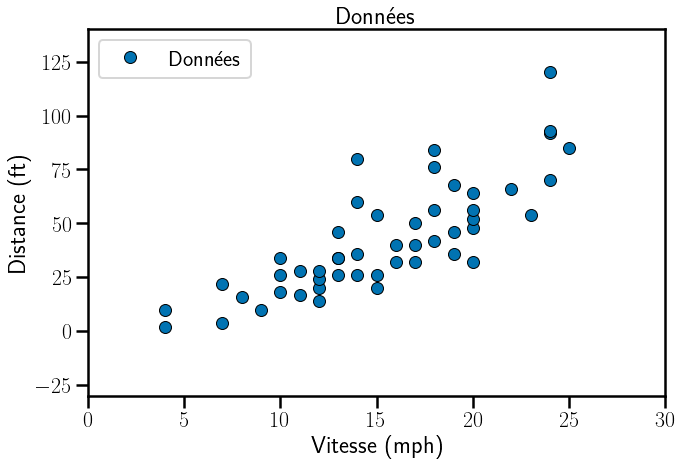

In [5]:
xlabels = 'Vitesse (mph)'
ylabels = 'Distance (ft)'

fig1 = plt.figure(figsize=(10, 7))
plt.xlabel(xlabels)
plt.ylabel(ylabels)
plt.title(r'Donn\'ees')
plt.plot(df_cars['Vitesse'], df_cars['Distance'], 'o',
         label=r'Donn\'ees', markeredgecolor='k', markeredgewidth=1)
axes = plt.gca()

xmin_normal = 0
xmax_normal = 30
ymin_normal = -30
ymax_normal = 140


plt.xlim(left=xmin_normal, right=xmax_normal)
plt.ylim(bottom=ymin_normal, top=ymax_normal)

plt.legend(numpoints=1, loc=2)  # numpoints = 1 for nicer display
plt.tight_layout()
plt.show()

my_saving_display(fig1, dirname, "cars_data_plot", imageformat, saving=saving)

# `stastsmodel`

C'est le package qui permet d'utiliser les fonctions classiques des moindres carrés (moindres carrés ordinaires, mais aussi ANOVA, etc.):

http://www.statsmodels.org/

# Plot data and OLS estimator

In [6]:
# Fit regression model (with statsmodels)
results = smf.ols('Distance ~ Vitesse', data=df_cars).fit()

# create axis value to evaluate the model
X_to_predict = np.linspace(0.0, 30.0, num=50).reshape(50, 1)
X_to_predict = pd.DataFrame(X_to_predict, columns=['Vitesse'])


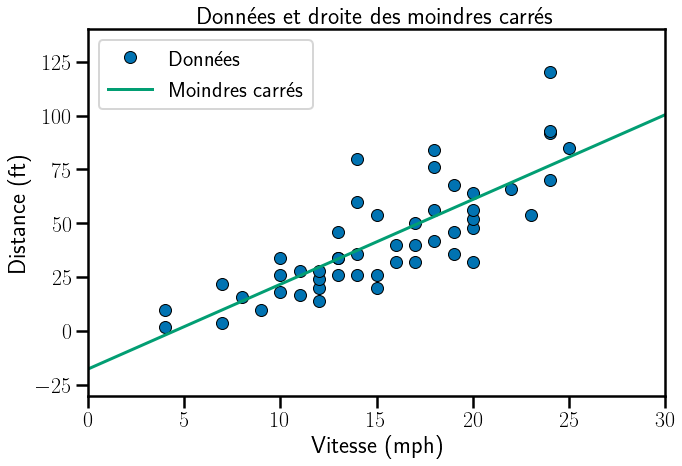

In [7]:
# Plot data + regression model

fig = plt.figure(figsize=(10, 7))
plt.xlabel(xlabels)
plt.ylabel(ylabels)
plt.plot(df_cars['Vitesse'], df_cars['Distance'], 'o',
         label=r'Donn\'ees', markeredgecolor='k', markeredgewidth=1)

plt.xlim(left=xmin_normal, right=xmax_normal)
plt.ylim(bottom=ymin_normal, top=ymax_normal)

plt.plot(X_to_predict, results.predict(X_to_predict),
         linewidth=3, color=my_orange, label=r"Moindres carr\'es")
plt.legend(numpoints=1, loc=2)  # numpoints = 1 for nicer display
plt.title(r"Donn\'ees et droite des moindres carr\'es")
plt.tight_layout()
plt.show()

my_saving_display(fig, dirname, "cars_data_plot_regression",
                  imageformat, saving=saving)

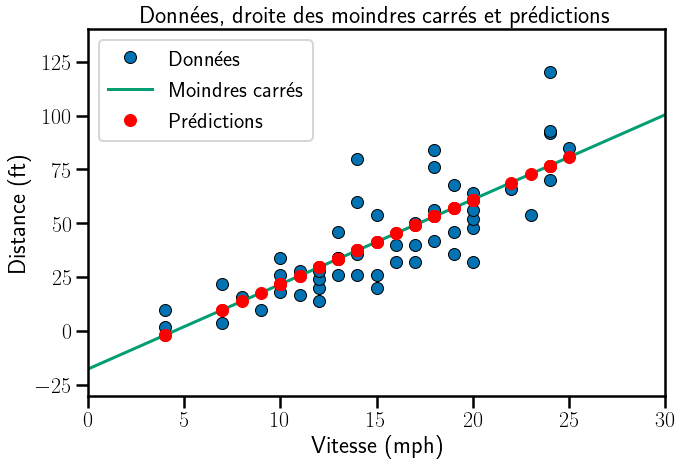

In [8]:
# Plot data + regression model + prediction on observed x_i

fig = plt.figure(figsize=(10, 7))
plt.xlabel(xlabels)
plt.ylabel(ylabels)

plt.plot(df_cars['Vitesse'], df_cars['Distance'], 'o',
         label=r'Donn\'ees', markeredgecolor='k', markeredgewidth=1)

plt.xlim(left=xmin_normal, right=xmax_normal)
plt.ylim(bottom=ymin_normal, top=ymax_normal)

plt.plot(X_to_predict, results.predict(X_to_predict),
         linewidth=3, color=my_orange, label=r"Moindres carr\'es")
plt.plot(df_cars['Vitesse'], results.predict(df_cars['Vitesse']), 'o', label=r"Pr\'edictions",
         color='r', markeredgewidth=1)
plt.legend(numpoints=1, loc=2)  # numpoints = 1 for nicer display
plt.title(r"Donn\'ees, droite des moindres carr\'es et pr\'edictions")
plt.tight_layout()
plt.show()

my_saving_display(fig, dirname, "cars_data_plot_regression_with_pred",
                  imageformat, saving=saving)

# Residuals

In [9]:
residual_pandas = pd.DataFrame(results.resid)
residual_manuel = pd.DataFrame(data=df_cars['Distance']- results.predict(df_cars['Vitesse']))
df_residuals = pd.concat([residual_pandas, residual_manuel], axis=1)
df_residuals.columns=['residual_pandas','residual_manuel']

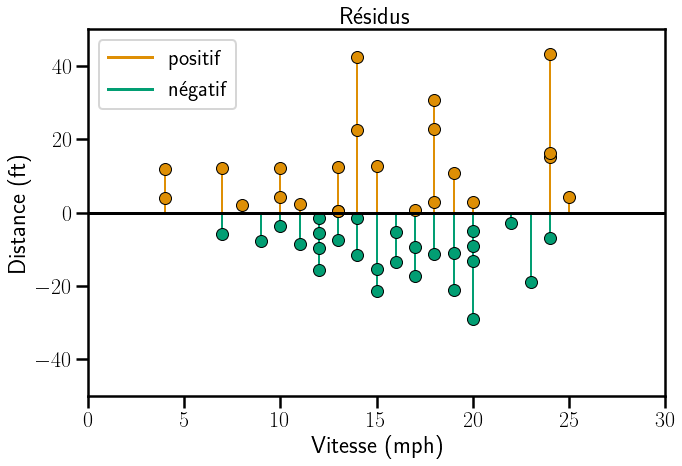

In [10]:
fig = plt.figure(figsize=(10, 7))
plt.xlim(left=0, right=30)
plt.ylim(bottom=-50, top=50)
plt.xlabel(xlabels)
plt.ylabel(ylabels)

legend_names = [r'positif', r'n\'egatif']
plots = []
proxies = []

# Positive residuals
positive_res = residual_pandas.values > 0
markerline, stemlines, baseline = plt.stem(df_cars[positive_res][['Vitesse']].values,
                                           residual_pandas[positive_res].values)
plots.append((markerline, stemlines, baseline))
plt.setp(stemlines, linewidth=2, color=my_green)   # set stems colors
plt.setp(markerline, 'markerfacecolor', my_green, markeredgecolor='k',
         markeredgewidth=1)    # make points green
h, = plt.plot(1, 1, color=my_green)
proxies.append(h)
plt.legend(proxies, legend_names, numpoints=1, loc=2)

# Negative residuals
negative_res = residual_pandas.values <= 0
markerline, stemlines, baseline = plt.stem(df_cars[negative_res][['Vitesse']].values,
                                           residual_pandas[negative_res].values)
plots.append((markerline, stemlines, baseline))
plt.setp(stemlines, linewidth=2, color=my_orange)   # set stems colors
plt.setp(markerline, 'markerfacecolor', my_orange, markeredgecolor='k',
         markeredgewidth=1)    # make points orange

plt.title(r'R\'esidus')
plt.axhline(y=0, ls='-', color='k')

h, = plt.plot(1, 1, color=my_orange)
proxies.append(h)
plt.legend(proxies, legend_names, numpoints=1, loc=2)


plt.tight_layout()
plt.show()

my_saving_display(fig, dirname, "cars_data_plot_regression_residual",
                  imageformat, saving=saving)

In [11]:
residual_pandas[positive_res].shape
# (df_cars[positive_res][['Vitesse']]).dtypes
# residual_pandas[positive_res]
# plt.stem(df_cars[positive_res][['Vitesse']], residual_pandas[positive_res])
# df_cars[positive_res][['Vitesse']]

(23, 1)

In [12]:
print(results.params)
sigmahat=np.sqrt(np.sum(residual_pandas.values ** 2)/ (n_sample - 2))
print("sigmahat={}".format(sigmahat))

Intercept   -17.579095
Vitesse       3.932409
dtype: float64
sigmahat=10.763468568422413


# Intervalle de confiance pour la prediction


In [13]:
alpha = 0.05
n_samples, _ = df_cars.shape
t_alpha = t.ppf(1 - alpha / 2, n_samples - 2)
sigmahat = np.sqrt(np.sum(results.resid ** 2) / (n_samples - 2))
meanX = (np.array(df_cars['Vitesse'].mean(axis=0), dtype=pd.Series))
# WARNING DDOF : TOUJOURS vérifier la normalisation pour les variances!
varX = (np.array(df_cars['Vitesse'].var(axis=0, ddof=0), dtype=pd.Series))
sigmapred_hat = (sigmahat**2 * (varX +
                                (X_to_predict['Vitesse'].values - meanX)**2) / (varX * n_samples)) ** 0.5
IC_down = results.predict(X_to_predict['Vitesse']) - t_alpha * sigmapred_hat
IC_up = results.predict(X_to_predict['Vitesse']) + t_alpha * sigmapred_hat

# <font color='red'> ATTENTION aux normalisations pour les variances et les écarts-types!!!</font>
Quand on calcule des variances avec `pandas` le paramètre par défaut est  `ddof = 1` alors que l'on a `ddof=0` par défaut dans `numpy`.
Pour éviter toute erreur il convient donc de toujours renseigner l'option `ddof` **explicitement**!


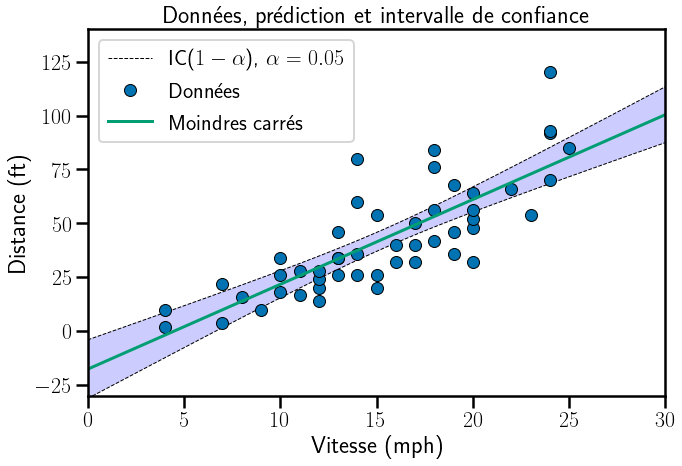

In [14]:
fig = plt.figure(figsize=(10, 7))
plt.xlabel(xlabels)
plt.ylabel(ylabels)

plt.plot(X_to_predict, IC_down,'--',color='k',  linewidth=1,
        label="IC($1-\\alpha$), $\\alpha={}$".format(alpha))
plt.plot(X_to_predict, IC_up,'--',color='k', linewidth=1, label='')

plt.plot(df_cars['Vitesse'], df_cars['Distance'], 'o',
         label=r'Donn\'ees', markeredgecolor='k', markeredgewidth=1)

plt.xlim(left=xmin_normal, right=xmax_normal)
plt.ylim(bottom=ymin_normal, top=ymax_normal)

plt.plot(X_to_predict, results.predict(X_to_predict),
         linewidth=3, color=my_orange, label=r"Moindres carr\'es")

ax = plt.gca()

ax.fill_between(X_to_predict.squeeze(),
                IC_up.astype(float),
                IC_down.astype(float), facecolor='blue', alpha=.2)

plt.legend(numpoints=1, loc=2)  # numpoints = 1 for nicer legend
plt.title(r'Donn\'ees, pr\'ediction et intervalle de confiance')
plt.tight_layout()
plt.show()

my_saving_display(fig, dirname, "cars_IC_plot_regression",
                  imageformat, saving=saving)

# Version avec `statsmodels`

In [15]:
results = smf.ols('Distance ~ Vitesse', data=df_cars).fit()
predictions = results.get_prediction(X_to_predict)
df_predictions = predictions.summary_frame(alpha=alpha)
IC_down_sm = df_predictions['mean_ci_lower'].astype(float)
IC_up_sm = df_predictions['mean_ci_upper'].astype(float)

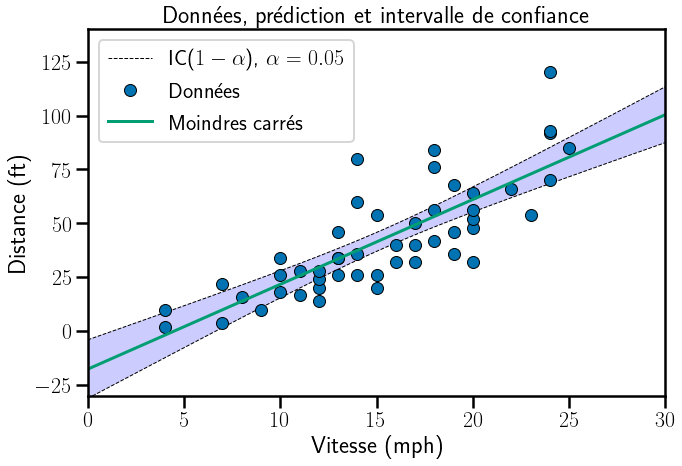

In [16]:
fig = plt.figure(figsize=(10, 7))

plt.xlabel(xlabels)
plt.ylabel(ylabels)
plt.xlim(left=xmin_normal, right=xmax_normal)
plt.ylim(bottom=ymin_normal, top=ymax_normal)

# Computing prediction interval using statmodels:
plt.plot(X_to_predict, IC_down_sm, '--', color='k',  linewidth=1,
         label="IC($1-\\alpha$), $\\alpha={}$".format(alpha))
plt.plot(X_to_predict, IC_up_sm, '--', color='k', linewidth=1, label='')

plt.plot(df_cars['Vitesse'], df_cars['Distance'], 'o',
         label=r'Donn\'ees', markeredgecolor='k', markeredgewidth=1)
plt.plot(X_to_predict['Vitesse'], results.predict(X_to_predict['Vitesse']),
         linewidth=3, color=my_orange, label=r"Moindres carr\'es")

# Calcul des ICs en prédiction avec statmodels:
ax = plt.gca()
ax.fill_between(X_to_predict.squeeze(),
                IC_up_sm,
                IC_down_sm, facecolor='blue', alpha=.2)

# numpoints = 1 nécessaire pour les légendes avec les vieilles version de matplotlib
plt.legend(numpoints=1, loc=2)
plt.title(r'Donn\'ees, pr\'ediction et intervalle de confiance')
plt.tight_layout()
plt.show()

## Intervalle de confiance sur $\beta_0^\star$ et $\beta_1^\star$

In [17]:
df_IC = results.conf_int(alpha=alpha)
print("IC ordonnée à l'origine: {}".format(df_IC.loc["Intercept", : ].values))
print("IC variable vitesse:     {}".format(df_IC.loc["Vitesse", : ].values))


IC ordonnée à l'origine: [-31.16784958  -3.9903402 ]
IC variable vitesse:     [3.09696433 4.76785319]


## Véifications des formules du cours pour les ICs pour  $\beta_0^\star$ et $\beta_1^\star$

In [18]:
n_samples, _ = df_cars.shape
t_alpha = t.ppf(1 - alpha / 2, n_samples - 2)
sigmahat = np.sqrt(np.sum(results.resid ** 2) / (n_samples - 2))
sigmapred_hat_0 = (sigmahat**2 * (varX + (0 - meanX)**2) / (varX * n_samples)) ** 0.5
sigmapred_hat_1 = (sigmahat**2 * 1 / (varX * n_samples)) ** 0.5
print(sigmapred_hat_0, sigmapred_hat_1)

6.758440169379237 0.41551277665712233


In [19]:
beta_0 = results.params.loc['Intercept']
beta_1 = results.params.loc['Vitesse']
print(beta_0, beta_1)

-17.579094890510955 3.9324087591240877


In [20]:
print("IC variable ordonneé à l'origine:     {}".format(
    [beta_0 - t_alpha * sigmapred_hat_0, beta_0 + t_alpha * sigmapred_hat_0]))
print("IC variable vitesse:                  {}".format(
    [beta_1 - t_alpha * sigmapred_hat_1, beta_1 + t_alpha * sigmapred_hat_1]))

IC variable ordonneé à l'origine:     [-31.16784958260138, -3.9903401984205296]
IC variable vitesse:                  [3.0969643293568554, 4.76785318889132]


## ICs en prédictions

In [21]:
X_5_15 = np.array([5, 15]).reshape(2, 1)
X_5_15 = pd.DataFrame(X_5_15, columns=['Vitesse'])

In [22]:
predictions = results.get_prediction(X_5_15)
df_predictions = predictions.summary_frame(alpha=alpha)
IC_down_5_15 = df_predictions['mean_ci_lower'].astype(float)
IC_up_5_15 = df_predictions['mean_ci_upper'].astype(float)
print(IC_down_5_15)
print(IC_up_5_15)
print("IC en prédiction pour v=5:     [{}, {}]".format(
    IC_down_5_15.iloc[0], IC_up_5_15.iloc[0]))
print("IC en prédiction pour v=15:     [{}, {}]".format(
    IC_down_5_15.iloc[1], IC_up_5_15.iloc[1]))

0    -7.644150
1    37.021152
Name: mean_ci_lower, dtype: float64
0    11.810048
1    45.792921
Name: mean_ci_upper, dtype: float64
IC en prédiction pour v=5:     [-7.644150359175656, 11.810048169394621]
IC en prédiction pour v=15:     [37.02115215992353, 45.792920832777185]


# Histogramme des résidus


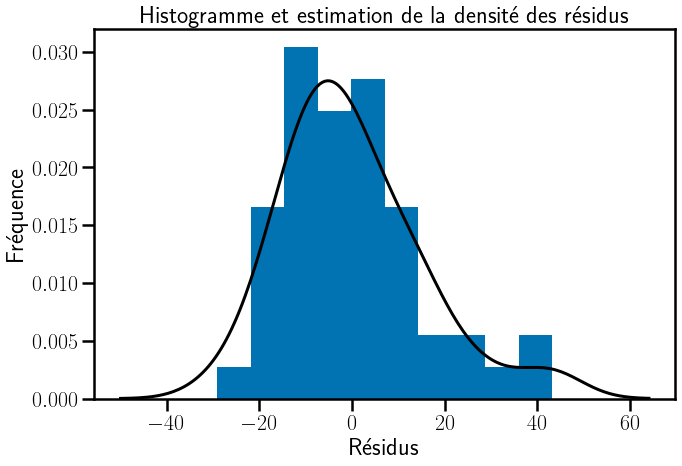

In [23]:
fig = plt.figure(figsize=(10, 7))
plt.hist(residual_pandas.values, bins=10, density=True, align='mid')
sns.kdeplot(residual_pandas.squeeze(), color='k')
plt.title(r'Histogramme et estimation de la densit\'e des r\'esidus ')
ax = plt.gca()
ax.legend_ = None
plt.xlabel(r'R\'esidus')
plt.ylabel(r'Fr\'equence')
plt.tight_layout()
plt.show()

my_saving_display(fig, dirname, "cars_residual_hist",
                  imageformat, saving=saving)

# OLS sans ordonnée à l'origine


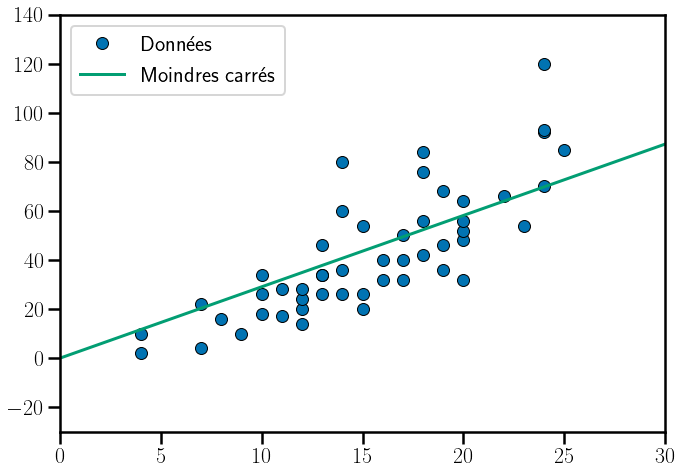

In [24]:
# Enlever l'ordonnée à l'origine (mettre l'ordonnée à zéro)
results_no_inter = smf.ols('Distance ~ Vitesse -1', data=df_cars).fit()


fig = plt.figure(figsize=(10, 7))

plt.plot(df_cars['Vitesse'], df_cars['Distance'], 'o',
         label=r'Donn\'ees', markeredgecolor='k', markeredgewidth=1)
plt.plot(X_to_predict, results_no_inter.predict(X_to_predict),
         linewidth=3, color=my_orange, label=r"Moindres carr\'es")

plt.xlim(left=xmin_normal, right=xmax_normal)
plt.ylim(bottom=ymin_normal, top=ymax_normal)

plt.legend(numpoints=1, loc=2)  # numpoints = 1 for nicer legend
plt.tight_layout()
plt.show()


my_saving_display(
    fig, dirname, "cars_data_plot_regression_statsmodel", imageformat, saving=saving)

# Second order with intercept = FALSE: physics tell you it is zero !


In [25]:
df_cars['V2'] = df_cars['Vitesse'] ** 2
results_no_inter = smf.ols('Distance ~ Vitesse + V2 -1', data=df_cars).fit()
X_to_predict['V2'] = X_to_predict['Vitesse']**2

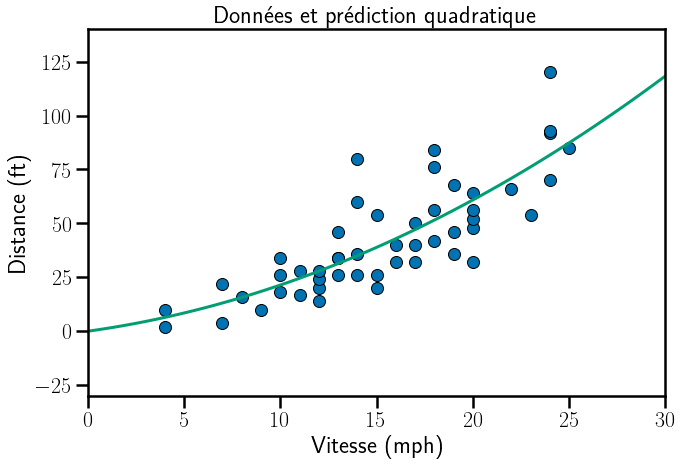

In [26]:
fig = plt.figure(figsize=(10, 7))

plt.plot(df_cars['Vitesse'], df_cars['Distance'], 'o',
         label=r'Donn\'ees', markeredgecolor='k', markeredgewidth=1)
plt.plot(X_to_predict['Vitesse'], results_no_inter.predict(X_to_predict),
         linewidth=3, color=my_orange, label=r"Moindres carr\'es")

plt.xlabel(xlabels),
plt.ylabel(ylabels)

plt.xlim(left=xmin_normal, right=xmax_normal)
plt.ylim(bottom=ymin_normal, top=ymax_normal)

plt.title(r'Donn\'ees et pr\'ediction quadratique')
plt.tight_layout()
plt.show()

my_saving_display(fig, dirname, "cars_data_plot_quad",
                  imageformat, saving=saving)

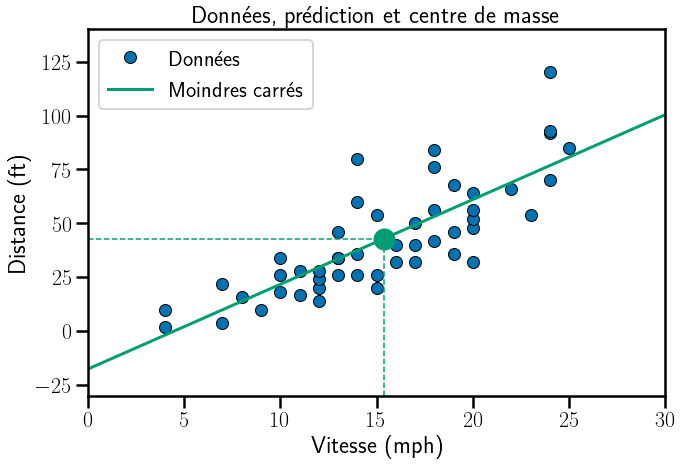

In [27]:
# With intercept and center of mass displayed

fig = plt.figure(figsize=(10, 7))

plt.xlim(left=xmin_normal, right=xmax_normal)
plt.ylim(bottom=ymin_normal, top=ymax_normal)

plt.plot(df_cars['Vitesse'], df_cars['Distance'], 'o',
         label=r'Donn\'ees', markeredgecolor='k', markeredgewidth=1)
plt.plot(X_to_predict['Vitesse'], results.predict(X_to_predict['Vitesse']),
         linewidth=3, color=my_orange, label=r"Moindres carr\'es")

plt.plot(df_cars['Vitesse'].mean(), df_cars['Distance'].mean(), 'or', markeredgewidth=10,
         markeredgecolor=my_orange)
plt.plot([df_cars['Vitesse'].mean(), df_cars['Vitesse'].mean()], [-30, df_cars['Distance'].mean()],
         color=my_orange, linewidth=1.5, linestyle="--")
plt.plot([0, df_cars['Vitesse'].mean()], [df_cars['Distance'].mean(), df_cars['Distance'].mean()], color=my_orange,
         linewidth=1.5, linestyle="--")
plt.legend(numpoints=1, loc=2)
plt.xlabel(xlabels), plt.ylabel(ylabels)

plt.title(r'Donn\'ees, pr\'ediction et centre de masse')
plt.tight_layout()
plt.show()

my_saving_display(fig, dirname,
                  "cars_data_plot_regression_intercept_gravity", imageformat, saving=saving)

# Cas de deux variables

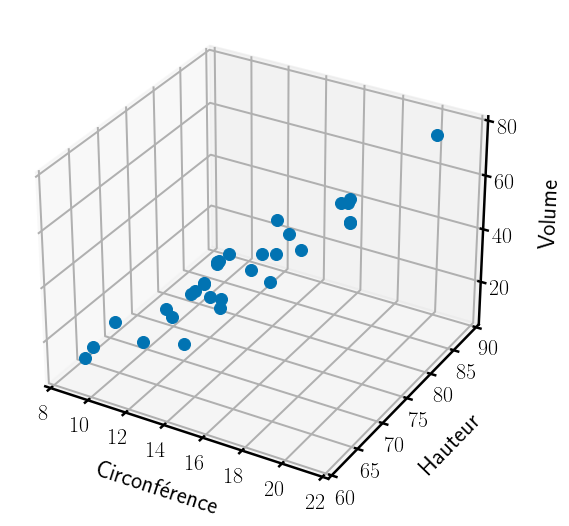

In [28]:
# 3D case drawing
from mpl_toolkits.mplot3d import Axes3D
plt.close("all")

# Load data
url = 'http://vincentarelbundock.github.io/Rdatasets/csv/datasets/trees.csv'
dat3 = pd.read_csv(url)

X = dat3[['Girth', 'Height']].assign(Const=1)
y = dat3['Volume']
results = sm.OLS(y, X).fit().params

XX = np.arange(8, 22, 0.5)
YY = np.arange(64, 90, 0.5)
xx, yy = np.meshgrid(XX, YY)
zz = results['Const'] + results['Girth'] * xx + results['Height'] * yy


fig = plt.figure()
ax = Axes3D(fig)

ax.set_xlim(8, 22)
ax.set_ylim(60, 90)
ax.set_zlim(5, 80)

ax.xaxis.labelpad = 20
ax.yaxis.labelpad = 20
ax.zaxis.labelpad = 20

ax.set_xlabel(r"Circonférence")
ax.set_ylabel(r'\ Hauteur', linespacing=5.2)
ax.set_zlabel(r'Volume', linespacing=5.2)

ax.plot(X['Girth'], X['Height'], y, 'o')
plt.show()
my_saving_display(fig, dirname, "tree_data", imageformat)

# With intercept and center of mass + recentering + rescaling

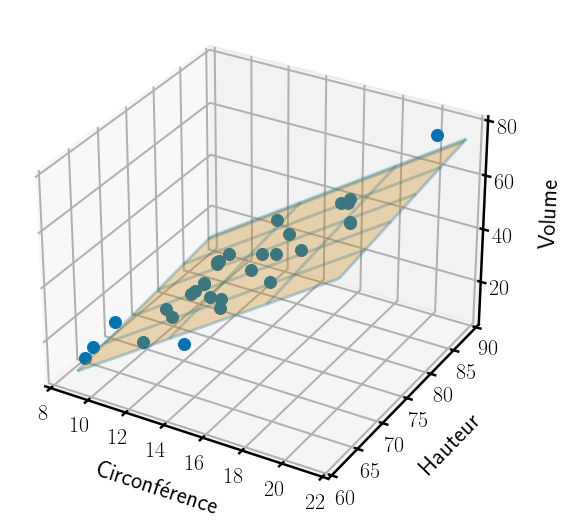

In [29]:
fig = plt.figure()
ax = Axes3D(fig)

ax.set_xlim(8, 22)
ax.set_ylim(60, 90)
ax.set_zlim(5, 80)

ax.plot(X['Girth'], X['Height'], y, 'o')
ax.plot_wireframe(xx, yy, zz, rstride=10, cstride=10, alpha=0.3)
ax.plot_surface(xx, yy, zz, alpha=0.3)

ax.set_xlabel(r'Circonférence')
ax.set_ylabel('Hauteur')
ax.set_zlabel('Volume')

ax.xaxis.labelpad = 20
ax.yaxis.labelpad = 20
ax.zaxis.labelpad = 20

my_saving_display(fig, dirname, "tree_data_plot_regression", imageformat)
plt.show()

### <font color='red'> EXERCICE : dispersion et moindres carrés. </font>

On montrera sur des exemples visuels simples l'impact de la dispersion en x sur l'incertitude du modèle, et le précepte: il vaut mieux disperser les mesures quand on peut pour réduire l'incertitude.

Cf. polycopié J. Pages page 120 pour voir la sensibilité des solutions

In [30]:
# sous échantillon étiré: bonne prédiction
df_etire = df_cars.iloc[[0, 1, 47, 48, 49]]

# sous échantillon concentré: mauvaise prédiction
df_concentre = df_cars.iloc[[10, 22, 23, 24, 25, 26, 40]]

In [31]:
# IC pour cas etire
results_etire = smf.ols('Distance ~ Vitesse', data=df_etire).fit()
predictions = results_etire.get_prediction(X_to_predict)
predictions.summary_frame(alpha=0.05)
df_predictions = predictions.summary_frame(alpha=alpha)
IC_down_etire = df_predictions['mean_ci_lower'].astype(float)
IC_up_etire = df_predictions['mean_ci_upper'].astype(float)

# IC pour cas etire

results_concentre = smf.ols('Distance ~ Vitesse', data=df_concentre).fit()
predictions = results_concentre.get_prediction(X_to_predict)
predictions.summary_frame(alpha=0.05)
df_predictions = predictions.summary_frame(alpha=alpha)
IC_down_concentre = df_predictions['mean_ci_lower'].astype(float)
IC_up_concentre = df_predictions['mean_ci_upper'].astype(float)

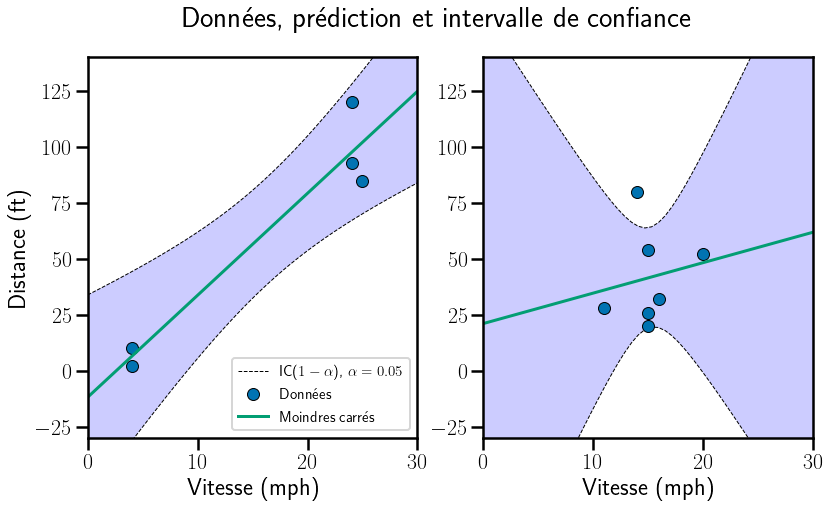

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 7))

fig.suptitle(r'Donn\'ees, pr\'ediction et intervalle de confiance')

ax1.set_xlabel(xlabels)
ax1.set_ylabel(ylabels)

ax1.plot(X_to_predict['Vitesse'], IC_down_etire, '--', color='k',  linewidth=1,
         label="IC($1-\\alpha$), $\\alpha={}$".format(alpha))
ax1.plot(X_to_predict['Vitesse'], IC_up_etire,
         '--', color='k', linewidth=1, label='')
ax1.plot(df_etire['Vitesse'], df_etire['Distance'], 'o',
         label=r"Donn\'ees", markeredgecolor='k', markeredgewidth=1)
ax1.plot(X_to_predict['Vitesse'], results_etire.predict(X_to_predict['Vitesse']), linewidth=3,
         color=my_orange,
         label=r"Moindres carr\'es")
ax1.fill_between(X_to_predict['Vitesse'],
                 IC_up_etire.astype(float),
                 IC_down_etire.astype(float), facecolor='blue', alpha=.2)

ax1.set_xlim(left=xmin_normal, right=xmax_normal)
ax1.set_ylim(bottom=ymin_normal, top=ymax_normal)

ax1.legend(numpoints=1, loc=4, fontsize=15)  # numpoints = 1 for nicer legend

ax2.set_xlabel(xlabels)
ax2.plot(X_to_predict['Vitesse'], IC_down_concentre, '--', color='k',  linewidth=1,
         label="IC($1-\\alpha$), $\\alpha={}$".format(alpha))
ax2.plot(X_to_predict['Vitesse'], IC_up_concentre,
         '--', color='k', linewidth=1, label='')
ax2.plot(df_concentre['Vitesse'], df_concentre['Distance'], 'o',
         label=r"Donn\'ees", markeredgecolor='k', markeredgewidth=1)
ax2.plot(X_to_predict['Vitesse'], results_concentre.predict(X_to_predict['Vitesse']), linewidth=3,
         color=my_orange,
         label=r"Moindres carr\'es")
ax2.fill_between(X_to_predict['Vitesse'],
                 IC_up_concentre.astype(float),
                 IC_down_concentre.astype(float), facecolor='blue', alpha=.2)

ax2.set_xlim(left=xmin_normal, right=xmax_normal)
ax2.set_ylim(bottom=ymin_normal, top=ymax_normal)


plt.show()

my_saving_display(fig, dirname, "cars_IC_plot_regression_etire_concentre",
                  imageformat, saving=saving)

### <font color='red'> EXERCICE : intervalle de confiance sur données simulées. </font>


In [33]:
# Random samples:
n_samples = 100
X = 50 * np.random.rand(n_samples, 1)
beta_0 = 3
beta_1 = 2
sigma = 8
y = X * beta_1 + beta_0 + sigma * np.random.randn(n_samples, 1)

df_simulated = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)
df_simulated.columns = ['X', 'y']

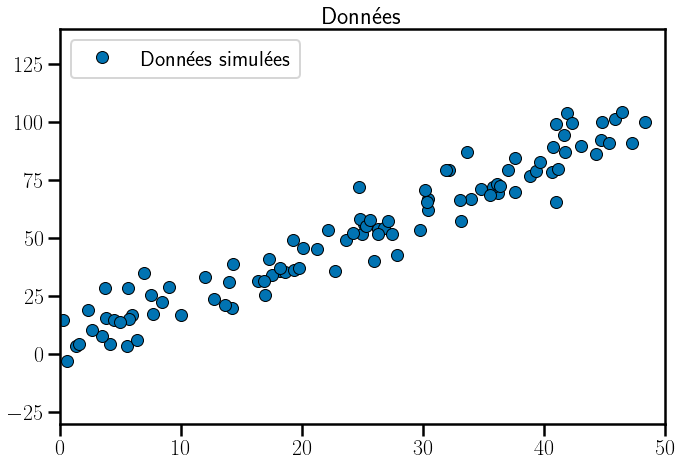

In [34]:
fig1 = plt.figure(figsize=(10, 7))

plt.title(r'Donn\'ees')
plt.plot(df_simulated['X'], df_simulated['y'], 'o',
         label=r'Donn\'ees simulées', markeredgecolor='k', markeredgewidth=1)
axes = plt.gca()

xmin_normal = 0
xmax_normal = 50
ymin_normal = -30
ymax_normal = 140


plt.xlim(left=xmin_normal, right=xmax_normal)
plt.ylim(bottom=ymin_normal, top=ymax_normal)

plt.legend(numpoints=1, loc=2)  # numpoints = 1 for nicer display
plt.tight_layout()
plt.show()

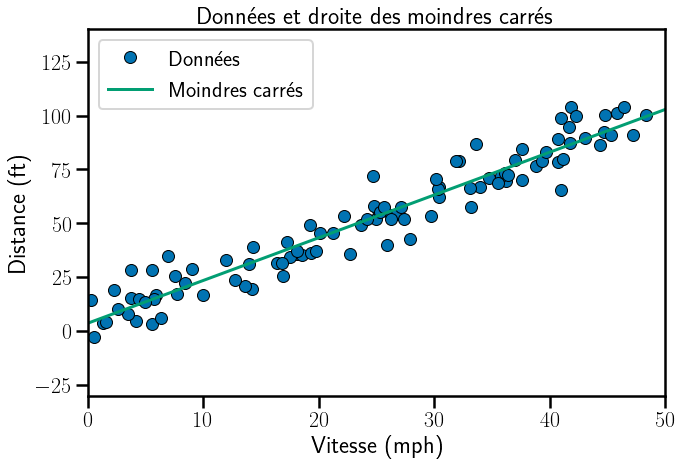

In [35]:
# Fit regression model (with statsmodels)
results = smf.ols('y ~ X', data=df_simulated).fit()

X_to_predict = pd.DataFrame(np.linspace(0.0, 50.0, num=50).reshape(50, 1))
X_to_predict.columns = ['X']

fig = plt.figure(figsize=(10, 7))

plt.plot(df_simulated['X'], df_simulated['y'], 'o',
         label=r"Donn\'ees", markeredgecolor='k', markeredgewidth=1)

plt.xlim(left=xmin_normal, right=xmax_normal)
plt.ylim(bottom=ymin_normal, top=ymax_normal)

plt.plot(X_to_predict, results.predict(X_to_predict),
         linewidth=3, color=my_orange, label=r"Moindres carr\'es")
plt.legend(numpoints=1, loc=2)  # numpoints = 1 for nicer display
plt.xlabel(xlabels), plt.ylabel(ylabels)
plt.title(r"Donn\'ees et droite des moindres carr\'es")
plt.tight_layout()
plt.show()

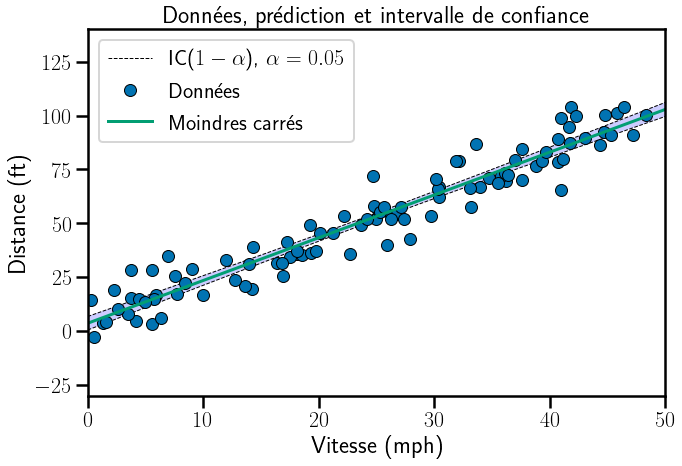

In [36]:
fig = plt.figure(figsize=(10, 7))

plt.xlabel(xlabels)
plt.ylabel(ylabels)

alpha = 0.05

predictions = results.get_prediction(X_to_predict)
df_predictions = predictions.summary_frame(alpha=alpha)
IC_down = df_predictions['mean_ci_lower'].astype(float)
IC_up = df_predictions['mean_ci_upper'].astype(float)


plt.plot(X_to_predict, IC_down, '--', color='k',  linewidth=1,
         label="IC($1-\\alpha$), $\\alpha={}$".format(alpha))
plt.plot(X_to_predict, IC_up, '--', color='k', linewidth=1, label='')

plt.plot(df_simulated['X'], df_simulated['y'], 'o',
         label=r"Donn\'ees", markeredgecolor='k', markeredgewidth=1)

plt.xlim(left=xmin_normal, right=xmax_normal)
plt.ylim(bottom=ymin_normal, top=ymax_normal)

plt.plot(X_to_predict, results.predict(X_to_predict),
         linewidth=3, color=my_orange, label=r"Moindres carr\'es")
ax = plt.gca()

ax.fill_between(X_to_predict.squeeze(),
                IC_up.astype(float),
                IC_down.astype(float), facecolor='blue', alpha=.2)

plt.xlim(left=xmin_normal, right=xmax_normal)
plt.ylim(bottom=ymin_normal, top=ymax_normal)

plt.legend(numpoints=1, loc=2)  # numpoints = 1 for nicer legend
plt.title(r'Donn\'ees, pr\'ediction et intervalle de confiance')
plt.tight_layout()
plt.show()

In [37]:
# Random samples:


def simulated_IC(n_samples=100, beta_0=3, beta_1=2, sigma=15, alpha=0.05):

    np.random.seed(44)

    X_to_predict = pd.DataFrame(np.linspace(0.0, 50.0, num=50).reshape(50, 1))
    X_to_predict.columns = ['X']

    X = 50 * np.random.rand(n_samples, 1)
    y = X * beta_1 + beta_0 + sigma * np.random.randn(n_samples, 1)

    df_simulated = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)
    df_simulated.columns = ['X', 'y']

    fig = plt.figure(figsize=(10, 7))

    plt.xlabel(xlabels)
    plt.ylabel(ylabels)

    results = smf.ols('y ~ X', data=df_simulated).fit()

    predictions = results.get_prediction(X_to_predict)
    df_predictions = predictions.summary_frame(alpha=alpha)
    IC_down = df_predictions['mean_ci_lower'].astype(float)
    IC_up = df_predictions['mean_ci_upper'].astype(float)

    plt.plot(X_to_predict, IC_down, '--', color='k',  linewidth=1,
             label="IC($1-\\alpha$), $\\alpha={}$".format(alpha))
    plt.plot(X_to_predict, IC_up, '--', color='k', linewidth=1, label='')

    plt.plot(df_simulated['X'], df_simulated['y'], 'o',
             label=r"Donn\'ees", markeredgecolor='k', markeredgewidth=1)

    plt.xlim(left=xmin_normal, right=xmax_normal)
    plt.ylim(bottom=ymin_normal, top=ymax_normal)

    plt.plot(X_to_predict, results.predict(X_to_predict),
             linewidth=3, color=my_orange, label=r"Moindres carr\'es")
    ax = plt.gca()

    ax.fill_between(X_to_predict.squeeze(),
                    IC_up.astype(float),
                    IC_down.astype(float), facecolor='blue', alpha=.2)

    plt.xlim(left=xmin_normal, right=xmax_normal)
    plt.ylim(bottom=ymin_normal, top=ymax_normal)

    plt.legend(numpoints=1, loc=2)  # numpoints = 1 for nicer legend
    plt.title(r'Donn\'ees, pr\'ediction et intervalle de confiance')
    plt.tight_layout()
    plt.show()

In [38]:
interact(simulated_IC,
         n_samples=IntSlider(min=5, max=200, step=5, value=100),
         beta_0=(0.1, 5, 0.1),
         beta_1=(0.1, 5, 0.1),
         sigma=(0.5, 20, 0.5),
         alpha=FloatLogSlider(value=0.0001, description='Log Slider', max=-1, min=-10.0, step=0.2)
         )

interactive(children=(IntSlider(value=100, description='n_samples', max=200, min=5, step=5), FloatSlider(value…

<function __main__.simulated_IC(n_samples=100, beta_0=3, beta_1=2, sigma=15, alpha=0.05)>

# Aspect numerique des intervalles de confiance

Répétons n_repetition = 1000 fois l'experience.
Quelle est la propotion de cas où la vraie valeur du model (au point x_to_predict),
c'est à dire x_to_predict * beta_1 + beta_0, appartient à l'IC fournit par la théorie.
Si notre analyse est bonne, en gros 95% du temps l'IC doit contenir cette valeur.

In [39]:
n_repetition = 1000
x_to_predict = pd.DataFrame([14])
x_to_predict.columns = ['X']

val = 0
for i in range(n_repetition):
    y = X * beta_1 + beta_0 + sigma * np.random.randn(n_samples, 1)
    df_simulated = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)
    df_simulated.columns = ['X', 'y']

    results = smf.ols('y ~ X', data=df_simulated).fit()

    predictions = results.get_prediction(x_to_predict)

    predictions.summary_frame(alpha=alpha)
    df_predictions = predictions.summary_frame(alpha=alpha)
    IC_down = df_predictions['mean_ci_lower'].astype(float)
    IC_up = df_predictions['mean_ci_upper'].astype(float)
    y_true = x_to_predict * beta_1 + beta_0
    if y_true.squeeze() > IC_down.squeeze() and IC_up.squeeze() > y_true.squeeze():
        val += 1
print("Proportion des IC qui contiennent la vraie valeur: {}".format(val/n_repetition))

Proportion des IC qui contiennent la vraie valeur: 0.964


## Conclusion
On trouve une valeur proche de 0.95 comme attendu!